In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import pandas as pd
import kagglehub

# Download the dataset using kagglehub
path = kagglehub.dataset_download("ejlok1/toronto-emotional-speech-set-tess")
print("Path to dataset files:", path)

# Define the base directory containing the subfolders (downloaded dataset path)
base_dir = path

# Initialize an empty list to store the data
data = []

# Walk through the directory and its subdirectories
for root, _, files in os.walk(base_dir):
    for file in files:
        if file.endswith(".wav"):  # Check if the file is an audio file
            file_path = os.path.join(root, file)
            # Extract the label (last word in the file name before the extension)
            label = file.split("_")[-1].split(".")[0]
            file_name = os.path.basename(file)
            data.append({"file_name": file_name, "file_path": file_path, "label": label})

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())


100%|██████████| 428M/428M [00:04<00:00, 90.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1
           file_name                                          file_path label
0    YAF_name_ps.wav  /root/.cache/kagglehub/datasets/ejlok1/toronto...    ps
1    YAF_wash_ps.wav  /root/.cache/kagglehub/datasets/ejlok1/toronto...    ps
2  YAF_should_ps.wav  /root/.cache/kagglehub/datasets/ejlok1/toronto...    ps
3     YAF_rat_ps.wav  /root/.cache/kagglehub/datasets/ejlok1/toronto...    ps
4    YAF_pain_ps.wav  /root/.cache/kagglehub/datasets/ejlok1/toronto...    ps


In [3]:
# # Define the base directory containing the subfolders
# base_dir = "C://Users//ml_te//voice_datasets"

# # Initialize an empty list to store the data
# data = []

# # Walk through the directory and its subdirectories
# for root, _, files in os.walk(base_dir):
#     for file in files:
#         if file.endswith(".wav"):  # Check if the file is an audio file
#             file_path = os.path.join(root, file)
#             # Extract the label (last word in the file name before the extension)
#             label = file.split("_")[-1].split(".")[0]
#             # Extract the file name without the directory
#             file_name = os.path.basename(file)
#             # Convert audio to text
#             data.append({"file_name": file_name, "file_path": file_path, "label": label})

# # Create a DataFrame
# df = pd.DataFrame(data)

# # Display the DataFrame
# df.head()



In [4]:
df1=pd.read_excel("/content/features_1.xlsx")
df1.head()

,Folder,Filename,Pitch,Intensity,Frequency,Amplitude,MFCCs,Spectral Centroid,Spectral Bandwidth,Spectral Rolloff,Spectral Flux,Energy,Jitter,Shimmer,ZCR,Tempo,Formants,Text,Emotion,Stress
0,OAF_angry,OAF_back_angry.wav,1410.588989,0.041406,1410.588989,0.337341,"[-390.0313415527344, 55.235965728759766, -15.0...",2244.518922,2417.499675,4023.786502,(7.856366210035048e-06-8.686884029884823e-07j),0.041406,NaN,NaN,0.081048,143.050781,"{'F1': None, 'F2': None, 'F3': None}",say the word,angry,9
1,OAF_angry,OAF_bar_angry.wav,1168.005859,0.022364,1168.005859,0.176117,"[-451.01947021484375, 67.048828125, -0.4482572...",2182.569100,2405.502339,3817.591309,(7.408749752357835e-06-2.919421149272239e-07j),0.022364,NaN,NaN,0.085180,130.046165,"{'F1': None, 'F2': None, 'F3': None}",say the word,angry,9
2,OAF_angry,OAF_base_angry.wav,1863.138916,0.029732,1863.138916,0.265015,"[-406.5633239746094, 28.609004974365234, -5.31...",2964.378675,2675.259261,5331.541280,(-3.4756992590700975e-06-8.736076779314317e-06j),0.029732,NaN,NaN,0.127679,143.050781,"{'F1': None, 'F2': None, 'F3': None}",say the word,angry,9
3,OAF_angry,OAF_bath_angry.wav,1489.154175,0.043054,1489.154175,0.343719,"[-386.34002685546875, 53.43965530395508, -8.66...",2636.422929,2515.913088,4431.942332,(-1.4807430943619693e-06-3.374229663677397e-06j),0.043054,NaN,NaN,0.105919,95.367188,"{'F1': None, 'F2': None, 'F3': None}",say the word,angry,9
4,OAF_angry,OAF_bean_angry.wav,1090.847290,0.030544,1090.847290,0.282318,"[-404.7848815917969, 54.46256637573242, 3.3552...",2330.168832,2432.395141,4295.259839,(5.316106125974329e-06+1.038062237057602e-05j),0.030544,NaN,NaN,0.076019,110.039062,"{'F1': None, 'F2': None, 'F3': None}",say the word,angry,9


In [5]:
df1.rename(columns={"Filename": "file_name"}, inplace=True)

In [6]:
df1.head()

,Folder,file_name,Pitch,Intensity,Frequency,Amplitude,MFCCs,Spectral Centroid,Spectral Bandwidth,Spectral Rolloff,Spectral Flux,Energy,Jitter,Shimmer,ZCR,Tempo,Formants,Text,Emotion,Stress
0,OAF_angry,OAF_back_angry.wav,1410.588989,0.041406,1410.588989,0.337341,"[-390.0313415527344, 55.235965728759766, -15.0...",2244.518922,2417.499675,4023.786502,(7.856366210035048e-06-8.686884029884823e-07j),0.041406,NaN,NaN,0.081048,143.050781,"{'F1': None, 'F2': None, 'F3': None}",say the word,angry,9
1,OAF_angry,OAF_bar_angry.wav,1168.005859,0.022364,1168.005859,0.176117,"[-451.01947021484375, 67.048828125, -0.4482572...",2182.569100,2405.502339,3817.591309,(7.408749752357835e-06-2.919421149272239e-07j),0.022364,NaN,NaN,0.085180,130.046165,"{'F1': None, 'F2': None, 'F3': None}",say the word,angry,9
2,OAF_angry,OAF_base_angry.wav,1863.138916,0.029732,1863.138916,0.265015,"[-406.5633239746094, 28.609004974365234, -5.31...",2964.378675,2675.259261,5331.541280,(-3.4756992590700975e-06-8.736076779314317e-06j),0.029732,NaN,NaN,0.127679,143.050781,"{'F1': None, 'F2': None, 'F3': None}",say the word,angry,9
3,OAF_angry,OAF_bath_angry.wav,1489.154175,0.043054,1489.154175,0.343719,"[-386.34002685546875, 53.43965530395508, -8.66...",2636.422929,2515.913088,4431.942332,(-1.4807430943619693e-06-3.374229663677397e-06j),0.043054,NaN,NaN,0.105919,95.367188,"{'F1': None, 'F2': None, 'F3': None}",say the word,angry,9
4,OAF_angry,OAF_bean_angry.wav,1090.847290,0.030544,1090.847290,0.282318,"[-404.7848815917969, 54.46256637573242, 3.3552...",2330.168832,2432.395141,4295.259839,(5.316106125974329e-06+1.038062237057602e-05j),0.030544,NaN,NaN,0.076019,110.039062,"{'F1': None, 'F2': None, 'F3': None}",say the word,angry,9


In [7]:
df.head()

,file_name,file_path,label
0,YAF_name_ps.wav,/root/.cache/kagglehub/datasets/ejlok1/toronto...,ps
1,YAF_wash_ps.wav,/root/.cache/kagglehub/datasets/ejlok1/toronto...,ps
2,YAF_should_ps.wav,/root/.cache/kagglehub/datasets/ejlok1/toronto...,ps
3,YAF_rat_ps.wav,/root/.cache/kagglehub/datasets/ejlok1/toronto...,ps
4,YAF_pain_ps.wav,/root/.cache/kagglehub/datasets/ejlok1/toronto...,ps


In [8]:
merged_df = pd.merge(df, df1, on="file_name", how="inner")
merged_df.head()

,file_name,file_path,label,Folder,Pitch,Intensity,Frequency,Amplitude,MFCCs,Spectral Centroid,...,Spectral Flux,Energy,Jitter,Shimmer,ZCR,Tempo,Formants,Text,Emotion,Stress
0,YAF_name_ps.wav,/root/.cache/kagglehub/datasets/ejlok1/toronto...,ps,YAF_pleasant_surprised,1604.310303,0.026503,1604.310303,0.175598,"[-370.2657165527344, 51.63714599609375, -1.162...",2994.926429,...,(-5.55909096533469e-08+1.8284326586126554e-07j),0.026503,NaN,NaN,0.134723,136.238839,"{'F1': None, 'F2': None, 'F3': None}",say the word,surprised,5
1,YAF_wash_ps.wav,/root/.cache/kagglehub/datasets/ejlok1/toronto...,ps,YAF_pleasant_surprised,2079.112549,0.027575,2079.112549,0.226349,"[-372.9852294921875, 34.11289596557617, -8.161...",3530.950068,...,(-2.900519859849737e-07-6.413920345949009e-07j),0.027575,NaN,NaN,0.199954,110.039062,"{'F1': None, 'F2': None, 'F3': None}",say the word wash,surprised,5
2,YAF_should_ps.wav,/root/.cache/kagglehub/datasets/ejlok1/toronto...,ps,YAF_pleasant_surprised,2088.580566,0.031741,2088.580566,0.202118,"[-337.91375732421875, 20.12289047241211, -12.1...",3771.545111,...,(-8.354044211955625e-07+1.3509220764262864e-07j),0.031741,NaN,NaN,0.219090,130.046165,"{'F1': None, 'F2': None, 'F3': None}",say the word,surprised,5
3,YAF_rat_ps.wav,/root/.cache/kagglehub/datasets/ejlok1/toronto...,ps,YAF_pleasant_surprised,1855.715698,0.032264,1855.715698,0.338196,"[-331.6074523925781, 35.97792434692383, -20.10...",3633.619781,...,(-1.671169002293027e-06+2.3603268672900413e-08j),0.032264,NaN,NaN,0.201507,178.813477,"{'F1': None, 'F2': None, 'F3': None}",say the word,surprised,5
4,YAF_pain_ps.wav,/root/.cache/kagglehub/datasets/ejlok1/toronto...,ps,YAF_pleasant_surprised,1822.826172,0.022780,1822.826172,0.186188,"[-385.0590515136719, 46.85655975341797, -1.825...",3388.044085,...,(1.96288760889729e-06+2.2046592107471952e-07j),0.022780,NaN,NaN,0.178133,102.179129,"{'F1': None, 'F2': None, 'F3': None}",say the word,surprised,5


In [9]:
import ast
def average_mfcc(mfcc_str):
    # Convert the string representation of list to actual list
    mfcc_list = ast.literal_eval(mfcc_str)
    # Calculate the average of the list
    return np.mean(mfcc_list)

merged_df['MFCCs'] = merged_df['MFCCs'].apply(average_mfcc)

In [10]:
# Convert the 'Spectral Flux' column to complex numbers if they are in string format
merged_df['Spectral Flux'] = merged_df['Spectral Flux'].apply(lambda x: complex(x) if isinstance(x, str) else x)

# Now calculate the magnitude (absolute value) of the complex numbers
merged_df['Spectral Flux'] = merged_df['Spectral Flux'].apply(lambda x: abs(x))

In [11]:
merged_df.head()

,file_name,file_path,label,Folder,Pitch,Intensity,Frequency,Amplitude,MFCCs,Spectral Centroid,...,Spectral Flux,Energy,Jitter,Shimmer,ZCR,Tempo,Formants,Text,Emotion,Stress
0,YAF_name_ps.wav,/root/.cache/kagglehub/datasets/ejlok1/toronto...,ps,YAF_pleasant_surprised,1604.310303,0.026503,1604.310303,0.175598,-29.621900,2994.926429,...,1.911073e-07,0.026503,NaN,NaN,0.134723,136.238839,"{'F1': None, 'F2': None, 'F3': None}",say the word,surprised,5
1,YAF_wash_ps.wav,/root/.cache/kagglehub/datasets/ejlok1/toronto...,ps,YAF_pleasant_surprised,2079.112549,0.027575,2079.112549,0.226349,-29.585227,3530.950068,...,7.039275e-07,0.027575,NaN,NaN,0.199954,110.039062,"{'F1': None, 'F2': None, 'F3': None}",say the word wash,surprised,5
2,YAF_should_ps.wav,/root/.cache/kagglehub/datasets/ejlok1/toronto...,ps,YAF_pleasant_surprised,2088.580566,0.031741,2088.580566,0.202118,-29.096461,3771.545111,...,8.462567e-07,0.031741,NaN,NaN,0.219090,130.046165,"{'F1': None, 'F2': None, 'F3': None}",say the word,surprised,5
3,YAF_rat_ps.wav,/root/.cache/kagglehub/datasets/ejlok1/toronto...,ps,YAF_pleasant_surprised,1855.715698,0.032264,1855.715698,0.338196,-28.320171,3633.619781,...,1.671336e-06,0.032264,NaN,NaN,0.201507,178.813477,"{'F1': None, 'F2': None, 'F3': None}",say the word,surprised,5
4,YAF_pain_ps.wav,/root/.cache/kagglehub/datasets/ejlok1/toronto...,ps,YAF_pleasant_surprised,1822.826172,0.022780,1822.826172,0.186188,-27.947283,3388.044085,...,1.975230e-06,0.022780,NaN,NaN,0.178133,102.179129,"{'F1': None, 'F2': None, 'F3': None}",say the word,surprised,5


In [12]:
columns_to_drop = ["label", "Folder", "file_name", "Formants","Emotion","Jitter", "Shimmer"]
data = merged_df.drop(columns=columns_to_drop)
data.head()

,file_path,Pitch,Intensity,Frequency,Amplitude,MFCCs,Spectral Centroid,Spectral Bandwidth,Spectral Rolloff,Spectral Flux,Energy,ZCR,Tempo,Text,Stress
0,/root/.cache/kagglehub/datasets/ejlok1/toronto...,1604.310303,0.026503,1604.310303,0.175598,-29.621900,2994.926429,2484.496892,5064.027091,1.911073e-07,0.026503,0.134723,136.238839,say the word,5
1,/root/.cache/kagglehub/datasets/ejlok1/toronto...,2079.112549,0.027575,2079.112549,0.226349,-29.585227,3530.950068,2378.207748,5849.351361,7.039275e-07,0.027575,0.199954,110.039062,say the word wash,5
2,/root/.cache/kagglehub/datasets/ejlok1/toronto...,2088.580566,0.031741,2088.580566,0.202118,-29.096461,3771.545111,2327.286437,5945.715524,8.462567e-07,0.031741,0.219090,130.046165,say the word,5
3,/root/.cache/kagglehub/datasets/ejlok1/toronto...,1855.715698,0.032264,1855.715698,0.338196,-28.320171,3633.619781,2422.480578,5920.943916,1.671336e-06,0.032264,0.201507,178.813477,say the word,5
4,/root/.cache/kagglehub/datasets/ejlok1/toronto...,1822.826172,0.022780,1822.826172,0.186188,-27.947283,3388.044085,2615.466884,5689.857642,1.975230e-06,0.022780,0.178133,102.179129,say the word,5


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   file_path           5600 non-null   object 
 1   Pitch               5600 non-null   float64
 2   Intensity           5600 non-null   float64
 3   Frequency           5600 non-null   float64
 4   Amplitude           5600 non-null   float64
 5   MFCCs               5600 non-null   float64
 6   Spectral Centroid   5600 non-null   float64
 7   Spectral Bandwidth  5600 non-null   float64
 8   Spectral Rolloff    5600 non-null   float64
 9   Spectral Flux       5600 non-null   float64
 10  Energy              5600 non-null   float64
 11  ZCR                 5600 non-null   float64
 12  Tempo               5600 non-null   float64
 13  Text                5600 non-null   object 
 14  Stress              5600 non-null   int64  
dtypes: float64(12), int64(1), object(2)
memory usage: 656.4

In [14]:
import librosa

# Define the extract_mfcc function
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)  # Load the audio file
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)  # Extract MFCC features
    return mfcc

# Assuming df['file_path'] contains file paths to audio files
data['mfcc_features'] = data['file_path'].apply(lambda x: extract_mfcc(x))

# Display the updated DataFrame
data.head()


,file_path,Pitch,Intensity,Frequency,Amplitude,MFCCs,Spectral Centroid,Spectral Bandwidth,Spectral Rolloff,Spectral Flux,Energy,ZCR,Tempo,Text,Stress,mfcc_features
0,/root/.cache/kagglehub/datasets/ejlok1/toronto...,1604.310303,0.026503,1604.310303,0.175598,-29.621900,2994.926429,2484.496892,5064.027091,1.911073e-07,0.026503,0.134723,136.238839,say the word,5,"[-375.57904, 82.77961, -5.4110694, 26.476393, ..."
1,/root/.cache/kagglehub/datasets/ejlok1/toronto...,2079.112549,0.027575,2079.112549,0.226349,-29.585227,3530.950068,2378.207748,5849.351361,7.039275e-07,0.027575,0.199954,110.039062,say the word wash,5,"[-367.92764, 52.99709, -12.90361, 10.822723, -..."
2,/root/.cache/kagglehub/datasets/ejlok1/toronto...,2088.580566,0.031741,2088.580566,0.202118,-29.096461,3771.545111,2327.286437,5945.715524,8.462567e-07,0.031741,0.219090,130.046165,say the word,5,"[-327.0685, 39.073284, -15.167968, 17.228817, ..."
3,/root/.cache/kagglehub/datasets/ejlok1/toronto...,1855.715698,0.032264,1855.715698,0.338196,-28.320171,3633.619781,2422.480578,5920.943916,1.671336e-06,0.032264,0.201507,178.813477,say the word,5,"[-311.47855, 58.67008, -32.76888, -12.142362, ..."
4,/root/.cache/kagglehub/datasets/ejlok1/toronto...,1822.826172,0.022780,1822.826172,0.186188,-27.947283,3388.044085,2615.466884,5689.857642,1.975230e-06,0.022780,0.178133,102.179129,say the word,5,"[-383.0621, 76.752846, -5.269395, 22.51041, -7..."


In [15]:
!pip install nltk

In [16]:
import os

# Check if nltk_data directory exists, and create it if necessary
nltk_data_path = '/root/nltk_data'
if not os.path.exists(nltk_data_path):
    os.makedirs(nltk_data_path)

print("NLTK Data path exists:", os.path.exists(nltk_data_path))


NLTK Data path exists: True


In [27]:
import nltk

import shutil

import os



# Specify the NLTK data directory path

nltk_data_path = '/root/nltk_data'



# Delete the directory if it already exists to ensure fresh downloads

if os.path.exists(nltk_data_path):

    shutil.rmtree(nltk_data_path)



# Download required NLTK packages
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [28]:
import os

# Check if punkt is available
punkt_path = '/root/nltk_data/tokenizers/punkt'
print(os.path.exists(punkt_path))  # Should return True if the resource exists


True


In [29]:

def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text.lower())

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back to string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Example usage
data['Text'] = data['Text'].apply(preprocess_text)
data.head()

,file_path,Pitch,Intensity,Frequency,Amplitude,MFCCs,Spectral Centroid,Spectral Bandwidth,Spectral Rolloff,Spectral Flux,Energy,ZCR,Tempo,Text,Stress,mfcc_features
0,/root/.cache/kagglehub/datasets/ejlok1/toronto...,1604.310303,0.026503,1604.310303,0.175598,-29.621900,2994.926429,2484.496892,5064.027091,1.911073e-07,0.026503,0.134723,136.238839,say word,5,"[-375.57904, 82.77961, -5.4110694, 26.476393, ..."
1,/root/.cache/kagglehub/datasets/ejlok1/toronto...,2079.112549,0.027575,2079.112549,0.226349,-29.585227,3530.950068,2378.207748,5849.351361,7.039275e-07,0.027575,0.199954,110.039062,say word wash,5,"[-367.92764, 52.99709, -12.90361, 10.822723, -..."
2,/root/.cache/kagglehub/datasets/ejlok1/toronto...,2088.580566,0.031741,2088.580566,0.202118,-29.096461,3771.545111,2327.286437,5945.715524,8.462567e-07,0.031741,0.219090,130.046165,say word,5,"[-327.0685, 39.073284, -15.167968, 17.228817, ..."
3,/root/.cache/kagglehub/datasets/ejlok1/toronto...,1855.715698,0.032264,1855.715698,0.338196,-28.320171,3633.619781,2422.480578,5920.943916,1.671336e-06,0.032264,0.201507,178.813477,say word,5,"[-311.47855, 58.67008, -32.76888, -12.142362, ..."
4,/root/.cache/kagglehub/datasets/ejlok1/toronto...,1822.826172,0.022780,1822.826172,0.186188,-27.947283,3388.044085,2615.466884,5689.857642,1.975230e-06,0.022780,0.178133,102.179129,say word,5,"[-383.0621, 76.752846, -5.269395, 22.51041, -7..."


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the text data to numerical features
tfidf_matrix = tfidf.fit_transform(data['Text'])

# Convert the sparse matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Merge back with the original data (optional)
data = pd.concat([data, tfidf_df], axis=1)

# Check the result
data.head()


,file_path,Pitch,Intensity,Frequency,Amplitude,MFCCs,Spectral Centroid,Spectral Bandwidth,Spectral Rolloff,Spectral Flux,...,wing,wire,wor,word,work,world,worship,ya,yes,young
0,/root/.cache/kagglehub/datasets/ejlok1/toronto...,1604.310303,0.026503,1604.310303,0.175598,-29.621900,2994.926429,2484.496892,5064.027091,1.911073e-07,...,0.0,0.0,0.0,0.715017,0.0,0.0,0.0,0.0,0.0,0.0
1,/root/.cache/kagglehub/datasets/ejlok1/toronto...,2079.112549,0.027575,2079.112549,0.226349,-29.585227,3530.950068,2378.207748,5849.351361,7.039275e-07,...,0.0,0.0,0.0,0.149212,0.0,0.0,0.0,0.0,0.0,0.0
2,/root/.cache/kagglehub/datasets/ejlok1/toronto...,2088.580566,0.031741,2088.580566,0.202118,-29.096461,3771.545111,2327.286437,5945.715524,8.462567e-07,...,0.0,0.0,0.0,0.715017,0.0,0.0,0.0,0.0,0.0,0.0
3,/root/.cache/kagglehub/datasets/ejlok1/toronto...,1855.715698,0.032264,1855.715698,0.338196,-28.320171,3633.619781,2422.480578,5920.943916,1.671336e-06,...,0.0,0.0,0.0,0.715017,0.0,0.0,0.0,0.0,0.0,0.0
4,/root/.cache/kagglehub/datasets/ejlok1/toronto...,1822.826172,0.022780,1822.826172,0.186188,-27.947283,3388.044085,2615.466884,5689.857642,1.975230e-06,...,0.0,0.0,0.0,0.715017,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
columns_to_drop = ["file_path","Text","MFCCs"]
data = data.drop(columns=columns_to_drop)
data.head()

,Pitch,Intensity,Frequency,Amplitude,Spectral Centroid,Spectral Bandwidth,Spectral Rolloff,Spectral Flux,Energy,ZCR,...,wing,wire,wor,word,work,world,worship,ya,yes,young
0,1604.310303,0.026503,1604.310303,0.175598,2994.926429,2484.496892,5064.027091,1.911073e-07,0.026503,0.134723,...,0.0,0.0,0.0,0.715017,0.0,0.0,0.0,0.0,0.0,0.0
1,2079.112549,0.027575,2079.112549,0.226349,3530.950068,2378.207748,5849.351361,7.039275e-07,0.027575,0.199954,...,0.0,0.0,0.0,0.149212,0.0,0.0,0.0,0.0,0.0,0.0
2,2088.580566,0.031741,2088.580566,0.202118,3771.545111,2327.286437,5945.715524,8.462567e-07,0.031741,0.219090,...,0.0,0.0,0.0,0.715017,0.0,0.0,0.0,0.0,0.0,0.0
3,1855.715698,0.032264,1855.715698,0.338196,3633.619781,2422.480578,5920.943916,1.671336e-06,0.032264,0.201507,...,0.0,0.0,0.0,0.715017,0.0,0.0,0.0,0.0,0.0,0.0
4,1822.826172,0.022780,1822.826172,0.186188,3388.044085,2615.466884,5689.857642,1.975230e-06,0.022780,0.178133,...,0.0,0.0,0.0,0.715017,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Columns: 284 entries, Pitch to young
dtypes: float64(282), int64(1), object(1)
memory usage: 12.1+ MB
None


In [33]:
print(data.isnull().sum())

Pitch                0
Intensity            0
Frequency            0
Amplitude            0
Spectral Centroid    0
                    ..
world                0
worship              0
ya                   0
yes                  0
young                0
Length: 284, dtype: int64


In [34]:
# data.fillna(data.mean(), inplace=True)

In [35]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Columns: 284 entries, Pitch to young
dtypes: float64(282), int64(1), object(1)
memory usage: 12.1+ MB
None


In [36]:
# Check for NaN values in your DataFrame
print(data.isna().sum())  # This will show the number of NaNs per column


Pitch                0
Intensity            0
Frequency            0
Amplitude            0
Spectral Centroid    0
                    ..
world                0
worship              0
ya                   0
yes                  0
young                0
Length: 284, dtype: int64


In [37]:
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns
print(non_numeric_cols)

Index(['mfcc_features'], dtype='object')


In [38]:
mfcc_df = pd.DataFrame(data['mfcc_features'].tolist(), columns=[f'mfcc_{i+1}' for i in range(len(data['mfcc_features'][0]))])
mfcc_df.head()

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,mfcc_31,mfcc_32,mfcc_33,mfcc_34,mfcc_35,mfcc_36,mfcc_37,mfcc_38,mfcc_39,mfcc_40
0,-375.579041,82.779610,-5.411069,26.476393,-16.851049,-12.462346,-1.801575,-25.670523,-9.679812,-16.717962,...,7.925464,13.763716,13.099888,9.931681,6.882424,9.410168,7.964216,6.787174,0.852480,2.009094
1,-367.927643,52.997089,-12.903610,10.822723,-36.860046,7.051910,-0.159972,-14.521749,-8.330216,4.333372,...,-1.708828,8.766258,6.766801,10.774256,10.921184,9.827233,7.131303,4.584373,2.059224,3.872106
2,-327.068512,39.073284,-15.167968,17.228817,-26.669992,4.176604,-15.526680,-19.001465,-11.286450,3.004277,...,-1.412855,9.108391,3.308903,9.726711,3.463638,8.546036,6.316467,7.672297,6.198055,7.828434
3,-311.478546,58.670078,-32.768879,-12.142362,-21.741556,8.628754,-9.362822,-14.658081,-9.859648,3.395884,...,2.958517,11.297494,4.838610,11.183881,7.138253,10.587382,7.770775,6.944561,5.112211,4.848320
4,-383.062103,76.752846,-5.269395,22.510410,-7.667251,-10.110474,-1.536938,-15.584971,-8.901774,-1.878500,...,0.469398,6.998691,2.848110,3.181634,3.698503,6.920490,3.928766,6.899549,5.354070,4.975713


In [39]:
# Merge back with the original data (optional)
data = pd.concat([data, mfcc_df], axis=1)
data.head()

,Pitch,Intensity,Frequency,Amplitude,Spectral Centroid,Spectral Bandwidth,Spectral Rolloff,Spectral Flux,Energy,ZCR,...,mfcc_31,mfcc_32,mfcc_33,mfcc_34,mfcc_35,mfcc_36,mfcc_37,mfcc_38,mfcc_39,mfcc_40
0,1604.310303,0.026503,1604.310303,0.175598,2994.926429,2484.496892,5064.027091,1.911073e-07,0.026503,0.134723,...,7.925464,13.763716,13.099888,9.931681,6.882424,9.410168,7.964216,6.787174,0.852480,2.009094
1,2079.112549,0.027575,2079.112549,0.226349,3530.950068,2378.207748,5849.351361,7.039275e-07,0.027575,0.199954,...,-1.708828,8.766258,6.766801,10.774256,10.921184,9.827233,7.131303,4.584373,2.059224,3.872106
2,2088.580566,0.031741,2088.580566,0.202118,3771.545111,2327.286437,5945.715524,8.462567e-07,0.031741,0.219090,...,-1.412855,9.108391,3.308903,9.726711,3.463638,8.546036,6.316467,7.672297,6.198055,7.828434
3,1855.715698,0.032264,1855.715698,0.338196,3633.619781,2422.480578,5920.943916,1.671336e-06,0.032264,0.201507,...,2.958517,11.297494,4.838610,11.183881,7.138253,10.587382,7.770775,6.944561,5.112211,4.848320
4,1822.826172,0.022780,1822.826172,0.186188,3388.044085,2615.466884,5689.857642,1.975230e-06,0.022780,0.178133,...,0.469398,6.998691,2.848110,3.181634,3.698503,6.920490,3.928766,6.899549,5.354070,4.975713


In [40]:
columns_to_drop = ["mfcc_features"]
data = data.drop(columns=columns_to_drop)
data.head()

,Pitch,Intensity,Frequency,Amplitude,Spectral Centroid,Spectral Bandwidth,Spectral Rolloff,Spectral Flux,Energy,ZCR,...,mfcc_31,mfcc_32,mfcc_33,mfcc_34,mfcc_35,mfcc_36,mfcc_37,mfcc_38,mfcc_39,mfcc_40
0,1604.310303,0.026503,1604.310303,0.175598,2994.926429,2484.496892,5064.027091,1.911073e-07,0.026503,0.134723,...,7.925464,13.763716,13.099888,9.931681,6.882424,9.410168,7.964216,6.787174,0.852480,2.009094
1,2079.112549,0.027575,2079.112549,0.226349,3530.950068,2378.207748,5849.351361,7.039275e-07,0.027575,0.199954,...,-1.708828,8.766258,6.766801,10.774256,10.921184,9.827233,7.131303,4.584373,2.059224,3.872106
2,2088.580566,0.031741,2088.580566,0.202118,3771.545111,2327.286437,5945.715524,8.462567e-07,0.031741,0.219090,...,-1.412855,9.108391,3.308903,9.726711,3.463638,8.546036,6.316467,7.672297,6.198055,7.828434
3,1855.715698,0.032264,1855.715698,0.338196,3633.619781,2422.480578,5920.943916,1.671336e-06,0.032264,0.201507,...,2.958517,11.297494,4.838610,11.183881,7.138253,10.587382,7.770775,6.944561,5.112211,4.848320
4,1822.826172,0.022780,1822.826172,0.186188,3388.044085,2615.466884,5689.857642,1.975230e-06,0.022780,0.178133,...,0.469398,6.998691,2.848110,3.181634,3.698503,6.920490,3.928766,6.899549,5.354070,4.975713


In [42]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode the 'Stress' column
data['Stress'] = label_encoder.fit_transform(data['Stress'])

# Check the encoding
print(data['Stress'])
print(data['Stress'].unique())

0       3
1       3
2       3
3       3
4       3
       ..
5595    5
5596    5
5597    5
5598    5
5599    5
Name: Stress, Length: 5600, dtype: int64
[3 2 5 1 6 0 4]


# traditional machine learning model

In [43]:
# Assuming your data is in a pandas DataFrame named 'data'
# Features (X) - All columns except the target column
X = data.drop(columns=['Stress'])  # Replace 'target_column' with the actual column name for your target
# Target (y) - The target variable you're trying to predict
y = data['Stress']  # Replace 'target_column' with the actual target column name


In [44]:
print(X)
print(y)

            Pitch  Intensity    Frequency  Amplitude  Spectral Centroid  \
0     1604.310303   0.026503  1604.310303   0.175598        2994.926429   
1     2079.112549   0.027575  2079.112549   0.226349        3530.950068   
2     2088.580566   0.031741  2088.580566   0.202118        3771.545111   
3     1855.715698   0.032264  1855.715698   0.338196        3633.619781   
4     1822.826172   0.022780  1822.826172   0.186188        3388.044085   
...           ...        ...          ...        ...                ...   
5595  2074.187500   0.058753  2074.187500   0.473083        3791.722040   
5596  2073.040771   0.040717  2073.040771   0.373932        3547.599335   
5597  1649.883545   0.082827  1649.883545   0.478546        2669.257432   
5598  1607.457520   0.090226  1607.457520   0.613098        3217.028846   
5599  1671.181885   0.077796  1671.181885   0.518799        2791.093069   

      Spectral Bandwidth  Spectral Rolloff  Spectral Flux    Energy       ZCR  \
0            2484.

In [45]:
# Split the data into 60% training, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [46]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (3360, 322), y_train shape: (3360,)
X_val shape: (1120, 322), y_val shape: (1120,)
X_test shape: (1120, 322), y_test shape: (1120,)


In [47]:
# # Check for columns with non-numeric data
# non_numeric_cols = X_train.select_dtypes(exclude=[np.number]).columns
# print(non_numeric_cols)

In [48]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [49]:
# # Initialize models
# # svc_model = SVC(kernel='rbf', probability=True, random_state=42)
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [50]:
# # Train and evaluate models
# history = {"svc": {"train_acc": [], "val_acc": []}, "rf": {"train_acc": [], "val_acc": []}}

# # SVC Model
# svc_model.fit(X_train, y_train)
# svc_train_acc = svc_model.score(X_train, y_train)
# svc_val_acc = svc_model.score(X_val, y_val)
# history["svc"]["train_acc"].append(svc_train_acc)
# history["svc"]["val_acc"].append(svc_val_acc)
# svc_predictions = svc_model.predict(X_test)
# svc_probs = svc_model.predict_proba(X_test)[:, 1]

# # Random Forest Model
# rf_model.fit(X_train, y_train)
# rf_train_acc = rf_model.score(X_train, y_train)
# rf_val_acc = rf_model.score(X_val, y_val)
# history["rf"]["train_acc"].append(rf_train_acc)
# history["rf"]["val_acc"].append(rf_val_acc)
# rf_predictions = rf_model.predict(X_test)
# rf_probs = rf_model.predict_proba(X_test)[:, 1]

In [51]:
# label_mapping = {0: '1', 1: '2', 2: '4', 3: '5', 4: '6', 5: '8', 6: '9'}
# decoded_label_mapping = {v: k for k, v in label_mapping.items()}  # Reverse mapping for display
# y_test_decoded = [label_mapping[label] for label in y_test]
# svc_predictions_decoded = [label_mapping[label] for label in svc_predictions]
# rf_predictions_decoded = [label_mapping[label] for label in rf_predictions]

In [52]:
# # Classification Reports for Decoded Labels
# print("SVC Classification Report (Decoded Labels):\n", classification_report(y_test_decoded, svc_predictions_decoded))
# print("Random Forest Classification Report (Decoded Labels):\n", classification_report(y_test_decoded, rf_predictions_decoded))

In [53]:
# # Confusion Matrices for Decoded Labels
# svc_cm_decoded = confusion_matrix(y_test_decoded, svc_predictions_decoded, labels=list(label_mapping.values()))
# rf_cm_decoded = confusion_matrix(y_test_decoded, rf_predictions_decoded, labels=list(label_mapping.values()))

In [54]:
# # Plot Confusion Matrices for Decoded Labels
# plt.figure(figsize=(12, 5))

# # SVC Confusion Matrix
# plt.subplot(1, 2, 1)
# sns.heatmap(svc_cm_decoded, annot=True, fmt='d', cmap="Blues",
#             xticklabels=list(label_mapping.values()), yticklabels=list(label_mapping.values()))
# plt.title("SVC Confusion Matrix (Decoded Labels)")
# plt.xlabel("Predicted")
# plt.ylabel("True")

# # Random Forest Confusion Matrix
# plt.subplot(1, 2, 2)
# sns.heatmap(rf_cm_decoded, annot=True, fmt='d', cmap="Blues",
#             xticklabels=list(label_mapping.values()), yticklabels=list(label_mapping.values()))
# plt.title("Random Forest Confusion Matrix (Decoded Labels)")
# plt.xlabel("Predicted")
# plt.ylabel("True")

# plt.tight_layout()
# plt.show()

In [55]:
# import joblib

# # Save SVC Model
# joblib.dump(svc_model, 'svc_audio_numerical_text.pkl')

# # Save Random Forest Model
# joblib.dump(rf_model, 'rf_audio_numerical_text.pkl')


# CNN model

In [56]:
# print(len(X))
# # print(len(y))

In [57]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (3360, 322), y_train shape: (3360,)
X_val shape: (1120, 322), y_val shape: (1120,)
X_test shape: (1120, 322), y_test shape: (1120,)


In [58]:
import torch
import torch.nn as nn
import torch.optim as optim

class StressCNN(nn.Module):
    def __init__(self, num_classes=7):
        super(StressCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, padding=1)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)  # Ensure dropout is defined here

        # We'll leave fc1 size flexible initially and calculate it after inspecting the shape
        self.fc1 = None
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)

        # Flatten to a 2D tensor for fully connected layer
        x = x.view(x.size(0), -1)

        if self.fc1 is None:
            # Dynamically calculate the input size for fc1 based on the current shape
            self.fc1 = nn.Linear(x.size(1), 128)

        x = self.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout here
        x = self.fc2(x)
        return x




In [59]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Adjust the labels by subtracting 1 from each target value
y_train_adjusted = y_train
y_val_adjusted = y_val
y_test_adjusted = y_test

# Convert pandas Series to numpy arrays before converting to torch tensors
y_train_adjusted = y_train_adjusted.to_numpy()  # Convert to numpy array
y_val_adjusted = y_val_adjusted.to_numpy()      # Convert to numpy array
y_test_adjusted = y_test_adjusted.to_numpy()    # Convert to numpy array

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # (batch_size, 1, 322)
y_train_tensor = torch.tensor(y_train_adjusted, dtype=torch.long)  # (batch_size,)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32).unsqueeze(1)
y_val_tensor = torch.tensor(y_val_adjusted, dtype=torch.long)  # (batch_size,)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test_adjusted, dtype=torch.long)  # (batch_size,)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_tensor, y_val_tensor), batch_size=batch_size)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size)

print(torch.unique(y_train_tensor))  # Check unique labels in the training set
print(torch.unique(y_val_tensor))    # Check unique labels in the validation set


tensor([0, 1, 2, 3, 4, 5, 6])
tensor([0, 1, 2, 3, 4, 5, 6])


In [60]:
# Check the shape of your training and validation data
print(X_train_tensor.shape)  # Should be (batch_size, seq_len, input_dim)
print(X_val_tensor.shape)    # Should be (batch_size, seq_len, input_dim)

torch.Size([3360, 1, 322])
torch.Size([1120, 1, 322])


### **AudioStreeCNN (CNN-LSTM Model)**

- **Input Layer:** Accepts 1D sequential audio data with a single input channel.
- **1D CNN Layers:** Three convolutional layers with kernel sizes of 5, 5, and 3, and output channels of 64, 128, and 256, respectively. Each layer is followed by ReLU activation, batch normalization, and MaxPooling (kernel size 2) to extract hierarchical features and reduce spatial dimensions.
- **Dropout Layers:** Dropout layers with a 20% rate applied after each pooling layer to reduce overfitting.
- **LSTM Layer:** A bidirectional LSTM with 128 hidden units per direction, 2 layers, capturing temporal dependencies in both forward and backward directions.
- **Fully Connected Layers:**
    - **FC1:** A Linear layer with 256 neurons, followed by a ReLU activation function and a 50% dropout layer to reduce overfitting.
    - **FC2:** A Linear layer with 7 neurons (matching the number of stress levels) for the final classification.
- **Output Layer:** Produces logits of size [batch_size, num_classes], representing predicted stress levels for classification.

In [71]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the model class
class AudioStressCNN(nn.Module):
    def __init__(self, num_classes=7):  # Number of output classes
        super(AudioStressCNN, self).__init__()

        # 1D CNN Layers for feature extraction
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=5, padding=2)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=5, padding=2)
        self.conv3 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=3, padding=1)

        self.relu = nn.ReLU()
        self.batch_norm1 = nn.BatchNorm1d(64)
        self.batch_norm2 = nn.BatchNorm1d(128)
        self.batch_norm3 = nn.BatchNorm1d(256)

        self.pool = nn.MaxPool1d(kernel_size=2)

        # Dropout layer for CNN feature extraction
        self.dropout_cnn = nn.Dropout(0.2)

        # LSTM Layer for capturing temporal dependencies
        self.lstm = nn.LSTM(input_size=256, hidden_size=128, num_layers=2, batch_first=True, bidirectional=True)

        # Fully connected layers for classification
        self.fc1 = nn.Linear(128 * 2, 256)  # Bidirectional LSTM doubles the hidden size
        self.dropout_fc = nn.Dropout(0.5)  # Dropout after FC1
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        # CNN feature extraction
        x = self.relu(self.batch_norm1(self.conv1(x)))
        x = self.pool(x)
        x = self.dropout_cnn(x)

        x = self.relu(self.batch_norm2(self.conv2(x)))
        x = self.pool(x)
        x = self.dropout_cnn(x)

        x = self.relu(self.batch_norm3(self.conv3(x)))
        x = self.pool(x)
        x = self.dropout_cnn(x)

        # Transpose for LSTM
        x = x.permute(0, 2, 1)

        # LSTM for temporal modeling
        x, _ = self.lstm(x)

        # Take the last time step's output
        x = x[:, -1, :]

        # Fully connected layers
        x = self.relu(self.fc1(x))
        x = self.dropout_fc(x)
        x = self.fc2(x)
        return x

# K-Fold Crossvalidation
from sklearn.model_selection import KFold
import numpy as np
early_stop_patience = 10
batch_size = 32
# Number of folds
k_folds = 5
num_classes=7

# Initialize k-fold cross-validation
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Track overall history
overall_history = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}

# Convert dataset to numpy for k-fold compatibility
X_data = X_train_tensor.numpy()
y_data = y_train_tensor.numpy()

# Iterate through each fold
for fold, (train_idx, val_idx) in enumerate(kf.split(X_data)):
    print(f"Fold {fold + 1}/{k_folds}")

    # Split the data into train and validation sets for this fold
    X_train_fold = torch.tensor(X_data[train_idx], dtype=torch.float32)
    y_train_fold = torch.tensor(y_data[train_idx], dtype=torch.long)
    X_val_fold = torch.tensor(X_data[val_idx], dtype=torch.float32)
    y_val_fold = torch.tensor(y_data[val_idx], dtype=torch.long)

    # Create DataLoaders for the fold
    train_loader = DataLoader(TensorDataset(X_train_fold, y_train_fold), batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(TensorDataset(X_val_fold, y_val_fold), batch_size=batch_size)

    # Initialize the model, loss function, and optimizer for this fold
    model = AudioStressCNN(num_classes=num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Track history for this fold
    fold_history = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}

    # Early stopping parameters
    best_val_loss = float('inf')
    patience_counter = 0

    # Training loop with validation for the current fold
    for epoch in range(500):  # Train for up to 500 epochs or until early stopping
        model.train()  # Set the model to training mode
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            # Accumulate loss and accuracy
            running_loss += loss.item() * X_batch.size(0)
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == y_batch).sum().item()
            total_train += y_batch.size(0)

        train_loss = running_loss / total_train
        train_accuracy = correct_train / total_train * 100

        # Validation step
        model.eval()  # Set the model to evaluation mode
        running_val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                val_outputs = model(X_batch)
                val_loss = criterion(val_outputs, y_batch)
                running_val_loss += val_loss.item() * X_batch.size(0)
                _, predicted = torch.max(val_outputs, 1)
                correct_val += (predicted == y_batch).sum().item()
                total_val += y_batch.size(0)

        val_loss = running_val_loss / total_val
        val_accuracy = correct_val / total_val * 100

        # Store history for this fold
        fold_history["train_loss"].append(train_loss)
        fold_history["val_loss"].append(val_loss)
        fold_history["train_acc"].append(train_accuracy)
        fold_history["val_acc"].append(val_accuracy)

        # Print progress
        print(f"Epoch [{epoch+1}/500], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

        # Early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0  # Reset counter if improvement
        else:
            patience_counter += 1

        if patience_counter >= early_stop_patience:
            print(f"Early stopping at epoch {epoch+1}. Best Validation Loss: {best_val_loss:.4f}")
            break

    # Append fold history to overall history
    overall_history["train_loss"].append(fold_history["train_loss"])
    overall_history["val_loss"].append(fold_history["val_loss"])
    overall_history["train_acc"].append(fold_history["train_acc"])
    overall_history["val_acc"].append(fold_history["val_acc"])

    print(f"Fold {fold + 1} completed. Best Validation Loss: {best_val_loss:.4f}\n")

# Average metrics across all folds
print("K-Fold Cross Validation Results:")
print(f"Average Training Loss: {np.mean([np.mean(f) for f in overall_history['train_loss']]):.4f}")
print(f"Average Validation Loss: {np.mean([np.mean(f) for f in overall_history['val_loss']]):.4f}")
print(f"Average Training Accuracy: {np.mean([np.mean(f) for f in overall_history['train_acc']]):.2f}%")
print(f"Average Validation Accuracy: {np.mean([np.mean(f) for f in overall_history['val_acc']]):.2f}%")



Fold 1/5
Epoch [1/500], Train Loss: 0.9670, Train Accuracy: 64.29%
Validation Loss: 0.3229, Validation Accuracy: 89.29%
Epoch [2/500], Train Loss: 0.2755, Train Accuracy: 91.00%
Validation Loss: 0.0905, Validation Accuracy: 97.17%
Epoch [3/500], Train Loss: 0.1711, Train Accuracy: 94.83%
Validation Loss: 0.0771, Validation Accuracy: 97.17%
Epoch [4/500], Train Loss: 0.1227, Train Accuracy: 96.17%
Validation Loss: 0.0814, Validation Accuracy: 97.32%
Epoch [5/500], Train Loss: 0.0921, Train Accuracy: 96.84%
Validation Loss: 0.0560, Validation Accuracy: 98.07%
Epoch [6/500], Train Loss: 0.0982, Train Accuracy: 96.80%
Validation Loss: 0.0314, Validation Accuracy: 98.96%
Epoch [7/500], Train Loss: 0.0573, Train Accuracy: 98.47%
Validation Loss: 0.0330, Validation Accuracy: 98.81%
Epoch [8/500], Train Loss: 0.0422, Train Accuracy: 98.29%
Validation Loss: 0.0443, Validation Accuracy: 98.96%
Epoch [9/500], Train Loss: 0.0641, Train Accuracy: 98.07%
Validation Loss: 0.0327, Validation Accuracy:

In [72]:
torch.save(model.state_dict(), "trained_model_modify_cnn_lstm_audio_text_numerical.pth")
print("Model saved to 'trained_model.pth'")
from google.colab import files
files.download("trained_model_modify_cnn_lstm_audio_text_numerical.pth")

Model saved to 'trained_model.pth'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Classification Report :

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       545
           2       0.97      0.97      0.97       355
           4       1.00      0.98      0.99       450
           5       0.99      1.00      0.99       470
           6       0.99      0.99      0.99       505
           8       0.99      1.00      1.00       550
           9       0.99      0.99      0.99       485

    accuracy                           0.99      3360
   macro avg       0.99      0.99      0.99      3360
weighted avg       0.99      0.99      0.99      3360



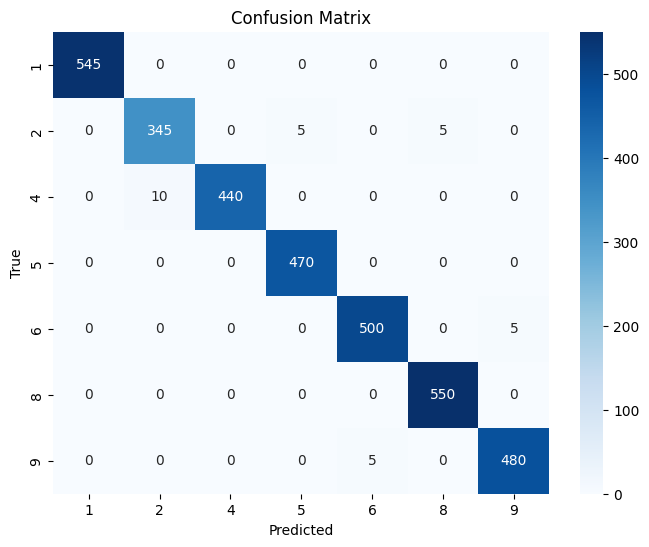

In [76]:

# Classification report
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import torch

# Initialize lists to store all predictions and true labels
all_preds = []
all_true = []

# Collect predictions and true labels for each fold
for fold, (train_idx, val_idx) in enumerate(kf.split(X_data)):
    # Inside the fold, after training:
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)

            # Store the predictions and true labels
            all_preds.extend(predicted.cpu().numpy())
            all_true.extend(y_batch.cpu().numpy())

# Classification report
label_mapping = {0: '1', 1: '2', 2: '4', 3: '5', 4: '6', 5: '8', 6: '9'}
# Decode labels
all_true_decoded = [label_mapping[label] for label in all_true]
all_preds_decoded = [label_mapping[label] for label in all_preds]

# Classification report with mapped labels
print("\nClassification Report :\n")
print(classification_report(all_true_decoded, all_preds_decoded, target_names=list(label_mapping.values())))

# Confusion matrix with mapped labels
cm = confusion_matrix(all_true_decoded, all_preds_decoded, labels=list(label_mapping.values()))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=list(label_mapping.values()), yticklabels=list(label_mapping.values()))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

